In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

11490434/11490434 [==============================] - 60s 5us/step


In [3]:
# Create a convolutional neural network (CNN) model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # Output layer with 10 units for 0-9 digits
])

In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [5]:
# Train the model
history = model.fit(train_images.reshape(-1, 28, 28, 1), train_labels, epochs=10,
                    validation_data=(test_images.reshape(-1, 28, 28, 1), test_labels))


Epoch 1/10
1875/1875 [==============================] - 38s 19ms/step - loss: 0.1370 - accuracy: 0.9579 - val_loss: 0.0534 - val_accuracy: 0.9822
Epoch 2/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0461 - accuracy: 0.9853 - val_loss: 0.0332 - val_accuracy: 0.9887
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0331 - accuracy: 0.9895 - val_loss: 0.0439 - val_accuracy: 0.9865
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0268 - accuracy: 0.9917 - val_loss: 0.0344 - val_accuracy: 0.9890
Epoch 5/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0210 - accuracy: 0.9931 - val_loss: 0.0320 - val_accuracy: 0.9901
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0170 - accuracy: 0.9944 - val_loss: 0.0405 - val_accuracy: 0.9891
Epoch 7/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0141 - accuracy: 0.9952 - val_loss: 0.0298 -

In [6]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images.reshape(-1, 28, 28, 1), test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

313/313 - 2s - loss: 0.0480 - accuracy: 0.9897 - 2s/epoch - 6ms/step

Test accuracy: 0.9897000193595886


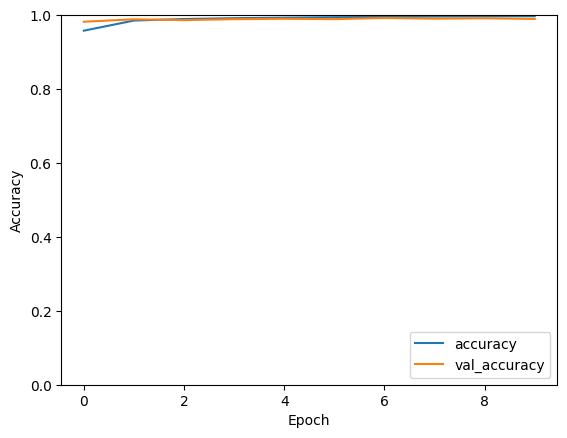

In [7]:
# Plot training history (optional)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()